# Running cgae-invar

This notebook is used to run the code found at [https://github.com/SonyCSLParis/cgae-invar]("https://github.com/SonyCSLParis/cgae-invar") .
Running the code is sensitive to versioning and so a pip list is provided as well. The code was run here using 3.9.13.

## setup
- clone the repository
- create & activate a virtual environment within the repository root using a python 3.9.xx interpreter 
- install requirements.txt
- install torch torchaudio torchvision
- copy this notebook into the repository root
- create a .txt file where each line represents a path to a local audio file
- install and run jupyterlab (this notebook must be run within this copy of jupyter lab to execute the code)

following these steps, here's a list of packages and versions used here:

In [1]:
! pip list

Package              Version
-------------------- ------------
anyio                3.6.1
appdirs              1.4.4
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.8
attrs                22.1.0
audioread            3.0.0
Babel                2.10.3
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
certifi              2022.6.15
cffi                 1.15.1
charset-normalizer   2.1.0
colorama             0.4.5
cycler               0.11.0
debugpy              1.6.3
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.10.0
fastjsonschema       2.16.1
fonttools            4.35.0
idna                 3.3
importlib-metadata   4.12.0
ipykernel            6.15.1
ipython              8.4.0
ipython-genutils     0.2.0
jedi                 0.18.1
Jinja2               3.1.2
joblib               1.1.0
json5                0.9.10
jsonschema           4.12.1
jupyter-client       7.3.4
jupy

You should consider upgrading via the 'C:\github\cgae-invar\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Training

- the train script can receive several parameters which can be listed using the -h argument

In [2]:
! python train.py -h

usage: train.py [-h] [--context-length L] [--n-factors N] [--n-mapping N]
                [--batch-size N] [--epochs N] [--lr R] [--sparsity-reg S]
                [--weight-reg S] [--block-size N] [--n-bins B]
                [--bins-per-oct B] [--fmin F] [--hop_length L] [--seed S]
                [--plot-interval I] [--refresh-cache]
                filelist run_keyword

Train a convolutional gatedautoencoder on audio data in CQT representation to
obtain locally transposition-invariant features.

positional arguments:
  filelist            text file containing a list of audio files fortraining
  run_keyword         keyword used for output path

optional arguments:
  -h, --help          show this help message and exit
  --context-length L  width of input window (default: 9)
  --n-factors N       size of factor layer (default: 256)
  --n-mapping N       size of mapping layers (default: (128, 64))
  --batch-size N      input batch size for training (default: 10)
  --epochs N          n

- this run uses all default parameters, so all that's needed are audio files to train on and a name for this model/run
- a premade filelist.txt file is used for training, with the following properties

In [3]:
training_file_list = r"filelist.txt"
with open (training_file_list) as f:
    lines = f.readlines()

num_files = len(lines)
preview_num = 3
print(f"the training file list contains {num_files} entries. \nThe first {preview_num} are: \n{lines[0:3]}")

the training file list contains 71 entries. 
The first 3 are: 
['C:\\git\\Datasets\\training_sinewaves_22050\\01.wav\n', 'C:\\git\\Datasets\\training_sinewaves_22050\\02.wav\n', 'C:\\git\\Datasets\\training_sinewaves_22050\\03.wav\n']


- consecutive runs can use the same preprocessed files, but when overwriting you audio files or adding new ones, you will need to reprocess the list and add --refresh-cache to the command.
- Running through the jupyter interface means there is no feedback on epochs progressed before training is done but the output folder will create plots every X epochs

In [16]:
from datetime import datetime

start_time = datetime.now().strftime( "%D,%H:%M:%S")

if(input("capital YES only to start training")=='YES'):
    print(f"{start_time} started training")
    ! python train.py filelist.txt run_0001 --refresh-cache
    
    end_time = datetime.now().strftime( "%D,%H:%M:%S")
    print(f"{end_time} finished training")
else:
    print("not training")

capital YES only to start training YES


08/20/22,12:14:04 started training
08/20/22,13:14:40 finished trainingloading file C:\git\Datasets\training_sinewaves_22050\10.wav
transforming C:\git\Datasets\training_sinewaves_22050\10.wav to cqt
loading file C:\git\Datasets\training_sinewaves_22050\11.wav
transforming C:\git\Datasets\training_sinewaves_22050\11.wav to cqt
loading file C:\git\Datasets\training_sinewaves_22050\12.wav
transforming C:\git\Datasets\training_sinewaves_22050\12.wav to cqt
loading file C:\git\Datasets\training_sinewaves_22050\43.wav
transforming C:\git\Datasets\training_sinewaves_22050\43.wav to cqt
loading file C:\git\Datasets\training_sinewaves_22050\44.wav
transforming C:\git\Datasets\training_sinewaves_22050\44.wav to cqt
loading file C:\git\Datasets\training_sinewaves_22050\45.wav
transforming C:\git\Datasets\training_sinewaves_22050\45.wav to cqt
loading file C:\git\Datasets\training_sinewaves_22050\71.wav
transforming C:\git\Datasets\training_sinewaves_22050\71.wav to cqt
loading file C:\git\Dataset

C:\github\cgae-invar\venv\lib\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## Test Results
The model is stored in the 'output' in a subfolder with the same name as the keyword above. Files for testing the second model are listed in a second .txt file

In [18]:
model_path = r"output/run_0001/model.save"
test_list_path = "filelist_test.txt"
! python convert.py filelist_test.txt run_0001

Written invariant representation to output\run_0001\01_sinewave_stairs.wav.invar.pyc.bz
Written invariant representation to output\run_0001\02_sawwave_stairs.wav.invar.pyc.bz
Written invariant representation to output\run_0001\03_choir_stairs.wav.invar.pyc.bz


C:\github\cgae-invar\venv\lib\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


The test results are stored in the same subfolder under outputs. The repository provides a function to open them

In [36]:
import cqt
import IPython.display as ipydisp
from librosa import icqt
from pathlib import Path

output_folder = Path("output","run_0001")
files = list(output_folder.glob("*.invar.pyc.bz"))

cqt_list = []
title_list = []
for num, file in enumerate(files):
    cqt_list.append(cqt.load_pyc_bz(file))
    title_list.append(file.stem.split('.wav')[0])

3


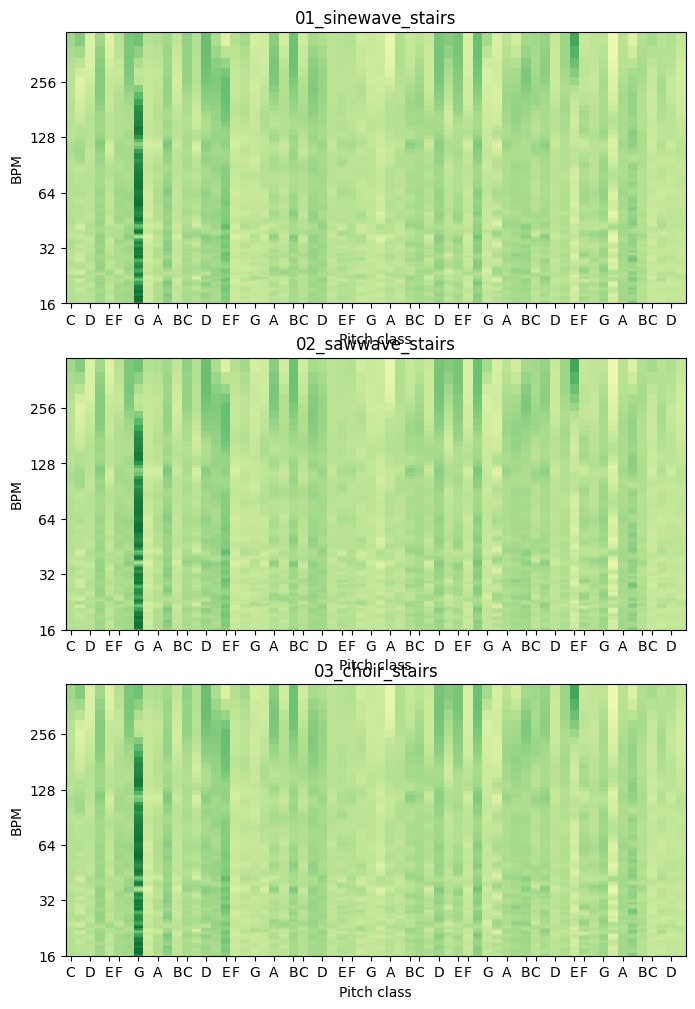

In [40]:
from librosa.display import specshow
import numpy as np
import matplotlib.pyplot as plt

_xaxis = 'chroma'
_yaxis = 'tempo'
_cmap = 'YlGn'

num_plots = len(cqt_list)
num_rows = 3
num_cols = np.ceil(num_plots/num_rows).astype(int)
figsize = (8,12)

fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

for ax, _cqt, _title in zip(axs, cqt_list, title_list):
    specshow(cqt_list[num], x_axis=_xaxis, y_axis=_yaxis, ax=ax, cmap=_cmap)
    ax.set_title(_title)

# plt.colorbar()
plt.show()

## Playback of ICQT of Outputs

In [43]:
import IPython.display as ipydisp

default_bins_per_octave = 24
default_nbins = 120
default_hop_length = 448
default_fmin = 65.4

audio_files=[]
for this_cqt in cqt_list:
    
    # print(f"shape of cqt: {this_cqt.shape}")
    this_audio = cqt.librosa.icqt(this_cqt.T, 
                     bins_per_octave=default_bins_per_octave, 
                     hop_length=default_hop_length, 
                     fmin=default_fmin)

    # print(f"shape of audio: {this_audio.shape}")
    audio_files.append(this_audio)


for audio, _title in zip(audio_files, title_list):
    print(_title)
    ipydisp.display(ipydisp.Audio(data=audio, rate= 44100)) 
    # Audio(data=audio, rate=44100/8)

01_sinewave_stairs


02_sawwave_stairs


03_choir_stairs


## Testing Pretrained Model

In [44]:
pretrained_model_path = r"output/pretrained/model.save"
test_list_path = "filelist_test.txt"
! python convert.py filelist_test.txt pretrained

Written invariant representation to output\pretrained\01_sinewave_stairs.wav.invar.pyc.bz
Written invariant representation to output\pretrained\02_sawwave_stairs.wav.invar.pyc.bz
Written invariant representation to output\pretrained\03_choir_stairs.wav.invar.pyc.bz


C:\github\cgae-invar\venv\lib\site-packages\torch\serialization.py:786: SourceChangeWarning: source code of class 'cgae.C_GAE' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\github\cgae-invar\venv\lib\site-packages\torch\serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\github\cgae-invar\venv\lib\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [45]:
pretrained_output_folder = Path("output","pretrained")
pretrained_files = list(pretrained_output_folder.glob("*.invar.pyc.bz"))

pretrained_cqt_list = []
pretrained_title_list = []
pretrained_audio_files = []
for num, file in enumerate(pretrained_files):
    pretrained_cqt_list.append(cqt.load_pyc_bz(file))
    pretrained_title_list.append(file.stem.split('.wav')[0])
    
for this_cqt in pretrained_cqt_list:
    # print(f"shape of cqt: {this_cqt.shape}")
    this_audio = cqt.librosa.icqt(this_cqt.T, 
                     bins_per_octave=default_bins_per_octave, 
                     hop_length=default_hop_length, 
                     fmin=default_fmin)
    # print(f"shape of audio: {this_audio.shape}")
    pretrained_audio_files.append(this_audio)


for audio, _title in zip(pretrained_audio_files, pretrained_title_list):
    print(_title)
    ipydisp.display(ipydisp.Audio(data=audio, rate= 44100)) 
    # Audio(data=audio, rate=44100/8)

01_sinewave_stairs


02_sawwave_stairs


03_choir_stairs
